#Maximum likelihood estimates and Fisher’s information

## Problem 1: Simulate Data and Analyze Using Linear Regression

### Problem Description  
Simulate data according to the model:

y=2x+ϵ

where \( x \) and \( \epsilon \) are drawn from a normal distribution using `numpy`. Visualize the data and fit a linear regression model using `scikit-learn`. Finally, save your scatter plot with the regression line as a PDF.



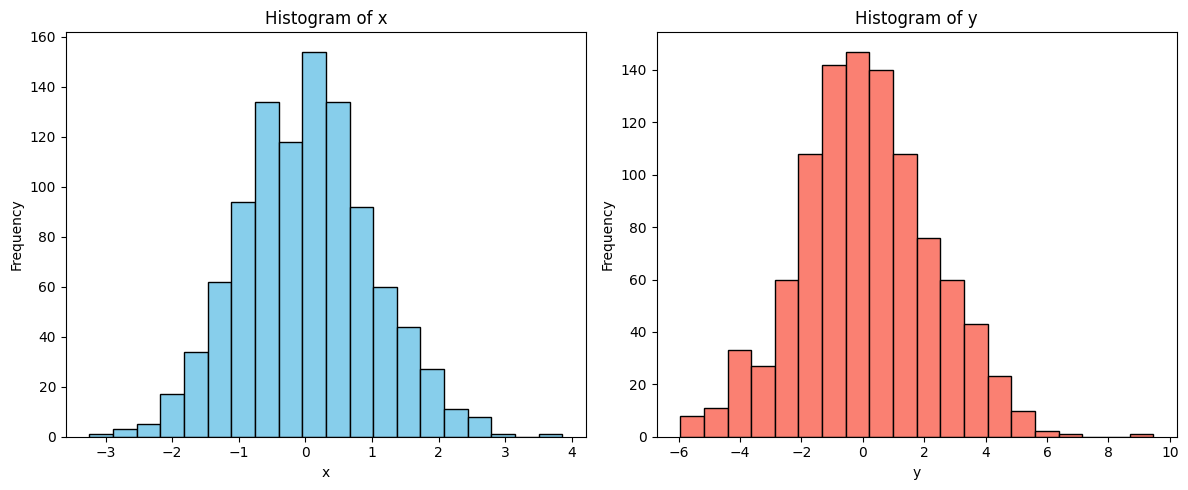

Intercept (α): 0.0716
Slope (β): 1.9588


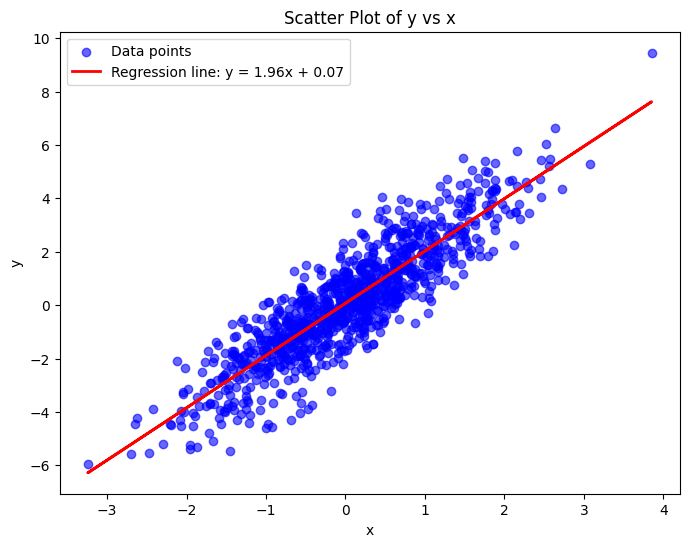

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Simulate predictor variable x and error term epsilon
n_samples = 1000
x = np.random.normal(loc=0, scale=1, size=n_samples)
epsilon = np.random.normal(loc=0, scale=1, size=n_samples)

# Compute response variable y
y = 2 * x + epsilon

# Visualize the distributions of x and y
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of x')
plt.xlabel('x')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y, bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of y')
plt.xlabel('y')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot of x vs y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Data points')
plt.title('Scatter Plot of y vs x')
plt.xlabel('x')
plt.ylabel('y')

# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

# Extract coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Display the coefficients
print(f"Intercept (α): {intercept:.4f}")
print(f"Slope (β): {slope:.4f}")

# Add regression line to the scatter plot
plt.plot(x, y_pred, color='red', linewidth=2, label=f'Regression line: y = {slope:.2f}x + {intercept:.2f}')
plt.legend()
plt.show()


## Problem 2: Implement the MLE for the Univariate Normal Distribution

### Problem Description  
The univariate normal distribution is given by:

\\[
f(x|\\mu, \\sigma) = \\frac{1}{\\sqrt{2\\pi\\sigma^2}} \\exp\\left( -\\frac{(x - \\mu)^2}{2\\sigma^2} \\right)
\\]

- Implement a function to evaluate this density function.
- Verify that the integral over the entire range equals 1.
- Implement MLE to estimate \\( \\mu \\) and \\( \\sigma \\) from data.


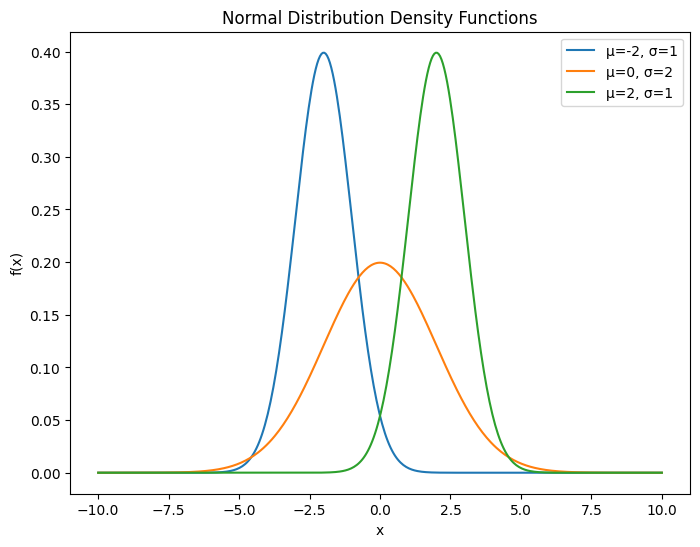

Integral over all x: 1.00000, Error estimate: 1.0178191437091558e-08
Estimated mu: 4.9493
Estimated sigma: 1.9963


In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

# Define the normal distribution density function
def norm_den(x, mu, sigma):
    coeff = 1 / (np.sqrt(2 * np.pi * sigma**2))
    exponent = -((x - mu)**2) / (2 * sigma**2)
    return coeff * np.exp(exponent)

# Visualize the function for selected mu and sigma
x_values = np.linspace(-10, 10, 400)

plt.figure(figsize=(8, 6))
for mu, sigma in [(-2, 1), (0, 2), (2, 1)]:
    y_values = norm_den(x_values, mu, sigma)
    plt.plot(x_values, y_values, label=f'μ={mu}, σ={sigma}')
plt.title('Normal Distribution Density Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Verify numerically that the integral over all x equals 1
result, error = quad(norm_den, -np.inf, np.inf, args=(0, 1))
print(f"Integral over all x: {result:.5f}, Error estimate: {error}")

# Implement MLE to estimate mu and sigma
def negative_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    # To ensure sigma > 0
    if sigma <= 0:
        return np.inf
    nll = -np.sum(np.log(norm_den(data, mu, sigma)))
    return nll

# Simulate data
np.random.seed(0)
data = np.random.normal(loc=5, scale=2, size=500)

# Initial guesses for mu and sigma
initial_params = [0, 1]

# Perform optimization
results = minimize(negative_log_likelihood, initial_params, args=(data,), bounds=[(None, None), (1e-6, None)])
mu_mle, sigma_mle = results.x

print(f"Estimated mu: {mu_mle:.4f}")
print(f"Estimated sigma: {sigma_mle:.4f}")


## Problem 3: Implement the MLEs for the Negative Binomial Distribution

### Problem Description  
The probability mass function of the negative binomial distribution is given by:

\\[
f(x|\\mu, \\phi) = \\frac{\\Gamma(x + \\phi^{-1})}{\\Gamma(\\phi^{-1})\\Gamma(x + 1)} \\left( \\frac{\\phi^{-1}}{\\mu + \\phi^{-1}} \\right)^{1/\\phi} \\left( \\frac{\\mu}{\\mu + \\phi^{-1}} \\right)^x
\\]

- Implement a function to evaluate the mass function.
- Perform MLE to estimate \\( \\mu \\) and \\( \\phi \\).



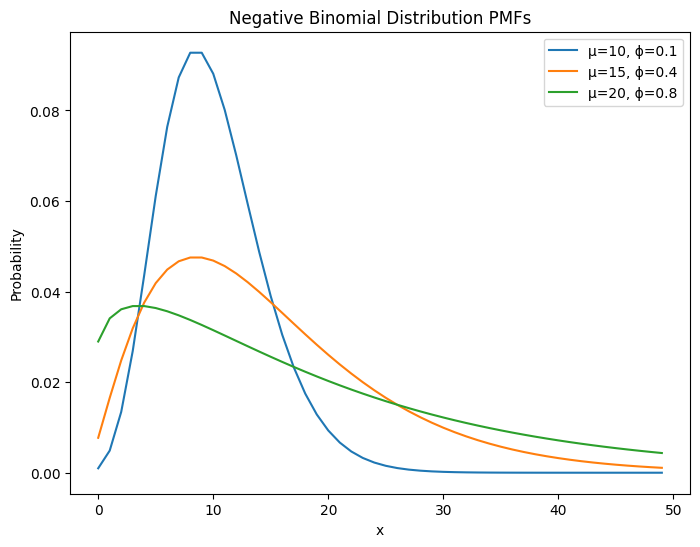

Estimated mu: 10.9992
Estimated phi: 0.9607
Sample mean: 15.5960
Sample variance: 209.4168
Method of moments estimate for phi: 0.7968


C:\Users\dadoi\AppData\Local\Temp\ipykernel_24924\1431925798.py:11: RuntimeWarning: overflow encountered in exp
  coeff = np.exp(gammaln(x + r) - gammaln(r) - gammaln(x + 1))
C:\Users\dadoi\AppData\Local\Temp\ipykernel_24924\1431925798.py:12: RuntimeWarning: invalid value encountered in multiply
  prob = coeff * (p**r) * ((1 - p)**x)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaln, digamma
from scipy.optimize import minimize
from scipy.stats import nbinom

# Define the negative binomial mass function
def nbin_mass_function(x, mu, phi):
    r = 1 / phi
    p = r / (r + mu)
    coeff = np.exp(gammaln(x + r) - gammaln(r) - gammaln(x + 1))
    prob = coeff * (p**r) * ((1 - p)**x)
    return prob

# Visualize the distribution for different mu and phi
x_values = np.arange(0, 50)

plt.figure(figsize=(8, 6))
for mu, phi in [(10, 0.1), (15, 0.4), (20, 0.8)]:
    pmf_values = nbin_mass_function(x_values, mu, phi)
    plt.plot(x_values, pmf_values, label=f'μ={mu}, ϕ={phi}')
plt.title('Negative Binomial Distribution PMFs')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Implement MLE to estimate mu and phi
def negative_log_likelihood_nbin(params, data):
    mu, phi = params[0], params[1]
    if mu <= 0 or phi <= 0:
        return np.inf
    nll = -np.sum(np.log(nbin_mass_function(data, mu, phi)))
    return nll

# Simulate data from a negative binomial distribution
np.random.seed(0)
mu_true = 15
phi_true = 0.8
r_true = 1 / phi_true
p_true = r_true / (r_true + mu_true)
data = nbinom.rvs(r_true, p_true, size=500)

# Initial guesses for mu and phi
initial_params = [10, 1]

# Perform optimization
results = minimize(negative_log_likelihood_nbin, initial_params, args=(data,), bounds=[(1e-6, None), (1e-6, None)])
mu_mle, phi_mle = results.x

print(f"Estimated mu: {mu_mle:.4f}")
print(f"Estimated phi: {phi_mle:.4f}")

# Validate implementation by comparing with sample mean and variance
sample_mean = np.mean(data)
sample_var = np.var(data)
phi_est = (sample_var - sample_mean) / sample_mean**2

print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample variance: {sample_var:.4f}")
print(f"Method of moments estimate for phi: {phi_est:.4f}")


## Problem 4: Fisher’s Information

### Problem Description  
Simulate data from a normal distribution and derive the Fisher information matrix for the parameters \( \alpha \), \( \beta \), and \( \sigma \). Use this matrix to compute the standard errors of the MLEs and compare them with those obtained using `statsmodels`.


In [11]:
# Import necessary libraries
import numpy as np
from scipy.stats import norm
from scipy.linalg import inv
import statsmodels.api as sm

# Generate dataset
np.random.seed(0)
n = 1000
x = np.random.normal(0, 1, n)
alpha_true = 2
beta_true = 3
sigma_true = 1

# Simulate response variable y
epsilon = np.random.normal(0, sigma_true, n)
y = alpha_true + beta_true * x + epsilon

# Define the Fisher Information matrix function
def fisher_information(x, sigma):
    n = len(x)
    I = np.zeros((3, 3))
    I[0, 0] = n / sigma**2  # ∂²l/∂α²
    I[0, 1] = np.sum(x) / sigma**2  # ∂²l/∂α∂β
    I[1, 0] = I[0, 1]  # Symmetry
    I[1, 1] = np.sum(x**2) / sigma**2  # ∂²l/∂β²
    I[2, 2] = n / (2 * sigma**2)  # ∂²l/∂σ²
    return I

# Estimate parameters using MLE
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
alpha_mle, beta_mle = model.params
sigma_mle = np.sqrt(np.sum((y - model.predict(X))**2) / n)

print(f"Estimated α: {alpha_mle:.4f}")
print(f"Estimated β: {beta_mle:.4f}")
print(f"Estimated σ: {sigma_mle:.4f}")

# Compute Fisher Information matrix at estimated parameters
I = fisher_information(x, sigma_mle)
print(I)
# Since σ appears only in diagonal terms, we can adjust the matrix as there is no interaction between σ and other parameters
I[0, 2] = I[2, 0] = 0  # ∂²l/∂α∂σ
I[1, 2] = I[2, 1] = 0  # ∂²l/∂β∂σ

# Compute the variance-covariance matrix (inverse of Fisher Information)
var_covar_matrix = inv(I)

# Standard errors are the square roots of the diagonal elements (the variances)
std_errors = np.sqrt(np.diag(var_covar_matrix))

print("\nStandard Errors from Fisher Information:")
print(f"SE(α): {std_errors[0]:.4f}")
print(f"SE(β): {std_errors[1]:.4f}")
print(f"SE(σ): {std_errors[2]:.4f}")

# Compare with standard errors from statsmodels
print("\nStandard Errors from statsmodels:")
print(f"SE(α): {model.bse[0]:.4f}")
print(f"SE(β): {model.bse[1]:.4f}")

# For σ, statsmodels does not directly provide SE, but we can estimate it
sigma_se = sigma_mle / np.sqrt(2 * n)
print(f"SE(σ): {sigma_se:.4f}")


Estimated α: 2.0122
Estimated β: 2.9691
Estimated σ: 0.9677
[[1067.9160474   -48.33036418    0.        ]
 [ -48.33036418 1042.58788298    0.        ]
 [   0.            0.          533.9580237 ]]

Standard Errors from Fisher Information:
SE(α): 0.0306
SE(β): 0.0310
SE(σ): 0.0433

Standard Errors from statsmodels:
SE(α): 0.0307
SE(β): 0.0310
SE(σ): 0.0216
